In [2]:
!pip install networkx

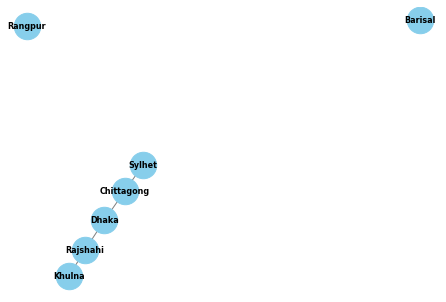

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add districts as nodes
districts = ["Dhaka", "Chittagong", "Sylhet", "Rajshahi", "Khulna", "Barisal", "Rangpur"]
G.add_nodes_from(districts)

# Add edges for shared boundaries
# Replace the following with actual boundary data
edges = [("Dhaka", "Chittagong"), ("Chittagong", "Sylhet"), ("Dhaka", "Rajshahi"), ("Rajshahi", "Khulna")]
G.add_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", font_size=8, font_color="black", edge_color="gray")

plt.show()


In [4]:
import geopandas as gpd

# Read the GeoJSON file
data = gpd.read_file('bangladesh.geojson')

# Print the data
print(data)



                     id  ID_1   NAME_1  ID_2   NAME_2  ID_3   NAME_3  ID_4  \
0      test_layer_1_1.1     1  Barisal     1  Barisal     1  Barisal     1   
1      test_layer_1_1.2     1  Barisal     1  Barisal     1  Barisal     2   
2      test_layer_1_1.3     1  Barisal     1  Barisal     1  Barisal     3   
3      test_layer_1_1.4     1  Barisal     1  Barisal     1  Barisal     4   
4      test_layer_1_1.5     1  Barisal     1  Barisal     1  Barisal     5   
..                  ...   ...      ...   ...      ...   ...      ...   ...   
458  test_layer_1_1.459     6   Sylhet    23   Sylhet    66   Sylhet   459   
459  test_layer_1_1.460     6   Sylhet    23   Sylhet    66   Sylhet   460   
460  test_layer_1_1.461     6   Sylhet    23   Sylhet    66   Sylhet   463   
461  test_layer_1_1.462     6   Sylhet    23   Sylhet    66   Sylhet   461   
462  test_layer_1_1.463     6   Sylhet    23   Sylhet    66   Sylhet   462   

         NAME_4 VARNAME_4                                      

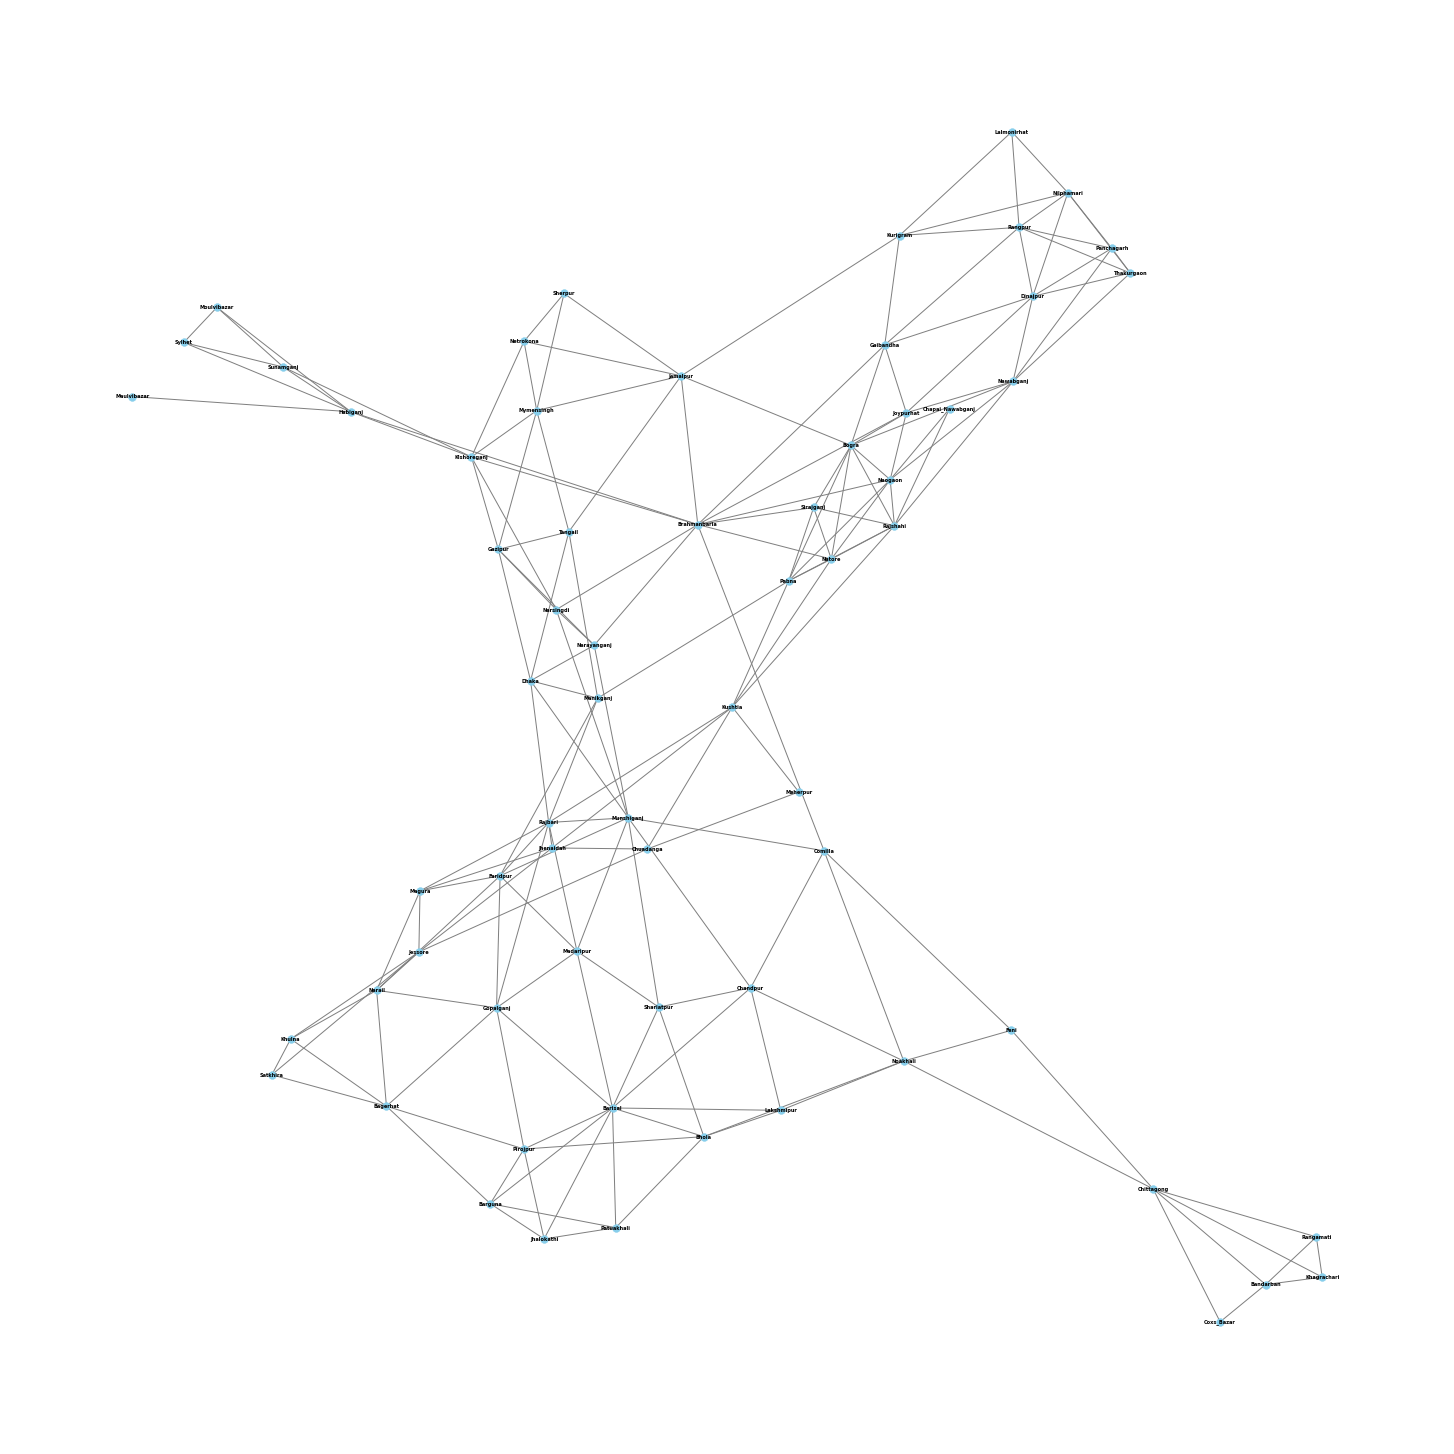

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing the neighbors of each district
district_neighbors = {
    'Bagerhat': ['Khulna', 'Gopalganj', 'Narail','Pirojpur', 'Barguna'],
    'Bandarban': ['Rangamati', 'Khagrachari', 'Chittagong','Coxs_Bazar'],
    'Barguna': ['Patuakhali', 'Jhalokathi','Barisal', 'Bagerhat', 'Pirojpur'],
    'Barisal': ['Shariatpur','Bhola', 'Patuakhali', 'Jhalokathi','Madaripur', 'Gopalganj', 'Barguna','Lakshmipur'],
    'Bhola': ['Barisal', 'Patuakhali', 'Lakshmipur', 'Noakhali'],
    'Bogra': ['Joypurhat', 'Gaibandha', 'Sirajganj', 'Natore', 'Naogaon'],
    'Brahmanbaria': ['Joypurhat', 'Gaibandha', 'Natore', 'Sirajganj','Jamalpur','Naogaon'],
    'Chandpur': ['Munshiganj', 'Comilla', 'Noakhali','Lakshmipur','Barisal','Comilla','Shariatpur','Munshiganj'],
    'Chapai_Nawabganj': ['Rajshahi', 'Naogaon'],
    'Chittagong': ['Coxs_Bazar', 'Bandarban', 'Rangamati', 'Khagrachari', 'Feni', 'Noakhali'],
    'Chuadanga': ['Meherpur', 'Kushtia', 'Jhenaidah','Jessore'],
    'Comilla': ['Brahmanbaria', 'Chandpur', 'Feni', 'Munshiganj', 'Noakhali'],
    'Coxs_Bazar': ['Bandarban'],
    'Dhaka': ['Gazipur', 'Tangail', 'Munshiganj', 'Rajbari', 'Manikganj', 'Narayanganj'],
    'Dinajpur': ['Thakurgaon', 'Panchagarh', 'Joypurhat', 'Rangpur', 'Gaibandha', 'Nilphamari'],
    'Faridpur': ['Madaripur', 'Manikganj', 'Magura', 'Narail', 'Gopalganj', 'Rajbari','Munshiganj'],
    'Feni': ['Chittagong', 'Comilla', 'Noakhali'],
    'Gaibandha': ['Rangpur', 'Kurigram',  'Joypurhat','Dinajpur'],
    'Gazipur': ['Kishoreganj','Tangail', 'Mymensingh', 'Narsingdi', 'Narayanganj', 'Dhaka'],
    'Gopalganj': ['Faridpur', 'Barisal', 'Narail', 'Madaripur','Pirojpur','Bagerhat'],
    'Habiganj': ['Maulvibazar', 'Sunamganj', 'Kishoreganj', 'Brahmanbaria', 'Sylhet'],
    'Jamalpur': ['Tangail', 'Mymensingh', 'Kurigram', 'Sherpur','Bogra'],
    'Jessore': ['Narail', 'Magura', 'Khulna', 'Satkhira', 'Jhenaidah'],
    'Jhalokathi': ['Barisal', 'Barguna','Pirojpur'],
    'Jhenaidah': ['Jessore', 'Magura', 'Kushtia', 'Chuadanga','Rajbari'],
    'Joypurhat': ['Bogra', 'Naogaon', 'Dinajpur', 'Gaibandha'],
    'Khagrachari': ['Rangamati', 'Chittagong'],
    'Khulna': ['Satkhira', 'Jessore', 'Narail', 'Bagerhat'],
    'Kishoreganj': ['Netrokona', 'Mymensingh', 'Brahmanbaria', 'Habiganj','Narsingdi','Sunamganj','Gazipur'],
    'Kurigram': ['Jamalpur', 'Lalmonirhat', 'Rangpur', 'Gaibandha'],
    'Kushtia': ['Rajshahi', 'Rajbari', 'Meherpur', 'Chuadanga', 'Jhenaidah','Natore','Pabna'],
    'Lakshmipur': ['Bhola', 'Noakhali', 'Barisal', 'Chandpur'],
    'Lalmonirhat': ['Kurigram', 'Rangpur', 'Nilphamari'],
    'Madaripur': ['Faridpur', 'Gopalganj', 'Barisal', 'Shariatpur','Munshiganj'],
    'Magura': ['Jessore', 'Narail', 'Rajbari', 'Jhenaidah', 'Faridpur'],
    'Manikganj': ['Pabna', 'Tangail', 'Faridpur'],
    'Meherpur': ['Chuadanga', 'Kushtia'],
    'Moulvibazar': ['Habiganj', 'Sylhet'],
    'Munshiganj': ['Dhaka', 'Narayanganj', 'Madaripur', 'Shariatpur', 'Chandpur', 'Comilla', 'Dhaka','Faridpur'],
    'Mymensingh': ['Gazipur', 'Netrokona', 'Kishoreganj', 'Jamalpur','Sherpur', 'Tangail'],
    'Naogaon': ['Rajshahi', 'Joypurhat', 'Bogra','Natore', 'Nawabganj'],
    'Narail': ['Jessore', 'Magura', 'Khulna','Gopalganj'],
    'Narayanganj': ['Gazipur', 'Narsingdi', 'Brahmanbaria', 'Dhaka'],
    'Narsingdi': ['Gazipur', 'Brahmanbaria', 'Narayanganj', 'Munshiganj'],
    'Natore': ['Pabna', 'Sirajganj', 'Rajshahi'],
    'Nawabganj': ['Dinajpur', 'Thakurgaon', 'Panchagarh', 'Joypurhat', 'Bogra', 'Rajshahi'],
    'Netrokona': ['Mymensingh', 'Kishoreganj', 'Jamalpur', 'Sherpur'],
    'Nilphamari': ['Rangpur', 'Lalmonirhat', 'Kurigram', 'Thakurgaon', 'Dinajpur'],
    'Noakhali': ['Feni', 'Comilla', 'Lakshmipur', 'Chandpur'],
    'Pabna': ['Sirajganj', 'Bogra', 'Naogaon', 'Natore'],
    'Panchagarh': ['Thakurgaon', 'Dinajpur', 'Nilphamari', 'Rangpur'],
    'Patuakhali': ['Bhola', 'Barisal', 'Barguna', 'Jhalokathi'],
    'Pirojpur': ['Barguna', 'Bhola', 'Barisal'],
    'Rajbari': ['Faridpur', 'Gopalganj', 'Madaripur', 'Munshiganj', 'Dhaka', 'Manikganj'],
    'Rajshahi': ['Naogaon', 'Natore', 'Chapai_Nawabganj', 'Bogra', 'Pabna'],
    'Rangamati': ['Khagrachari', 'Bandarban', 'Chittagong'],
    'Rangpur': ['Kurigram', 'Lalmonirhat', 'Nilphamari', 'Thakurgaon', 'Dinajpur', 'Gaibandha'],
    'Satkhira': ['Jessore', 'Khulna', 'Bagerhat'],
    'Shariatpur': ['Barisal', 'Chandpur', 'Bhola', 'Madaripur'],
    'Sherpur': ['Netrokona', 'Mymensingh', 'Jamalpur'],
    'Sirajganj': ['Bogra', 'Pabna', 'Natore', 'Rajshahi'],
    'Sunamganj': ['Habiganj', 'Sylhet', 'Moulvibazar'],
    'Sylhet': ['Habiganj', 'Moulvibazar', 'Sunamganj'],
    'Tangail': ['Gazipur', 'Manikganj', 'Dhaka', 'Mymensingh', 'Jamalpur']
}

# Create a graph
G = nx.Graph()

# Add nodes (districts) to the graph
G.add_nodes_from(district_neighbors.keys())

# Add edges between neighboring districts
for district, neighbors in district_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(district, neighbor)

# Draw the graph
pos = nx.spring_layout(G)  # You can change the layout algorithm if needed
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, font_size=5, node_size=60, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)
# make the node size smaller


# Display the plot and zoom in to see the edges clearly

plt.show()


In [6]:
!pip install geopandas


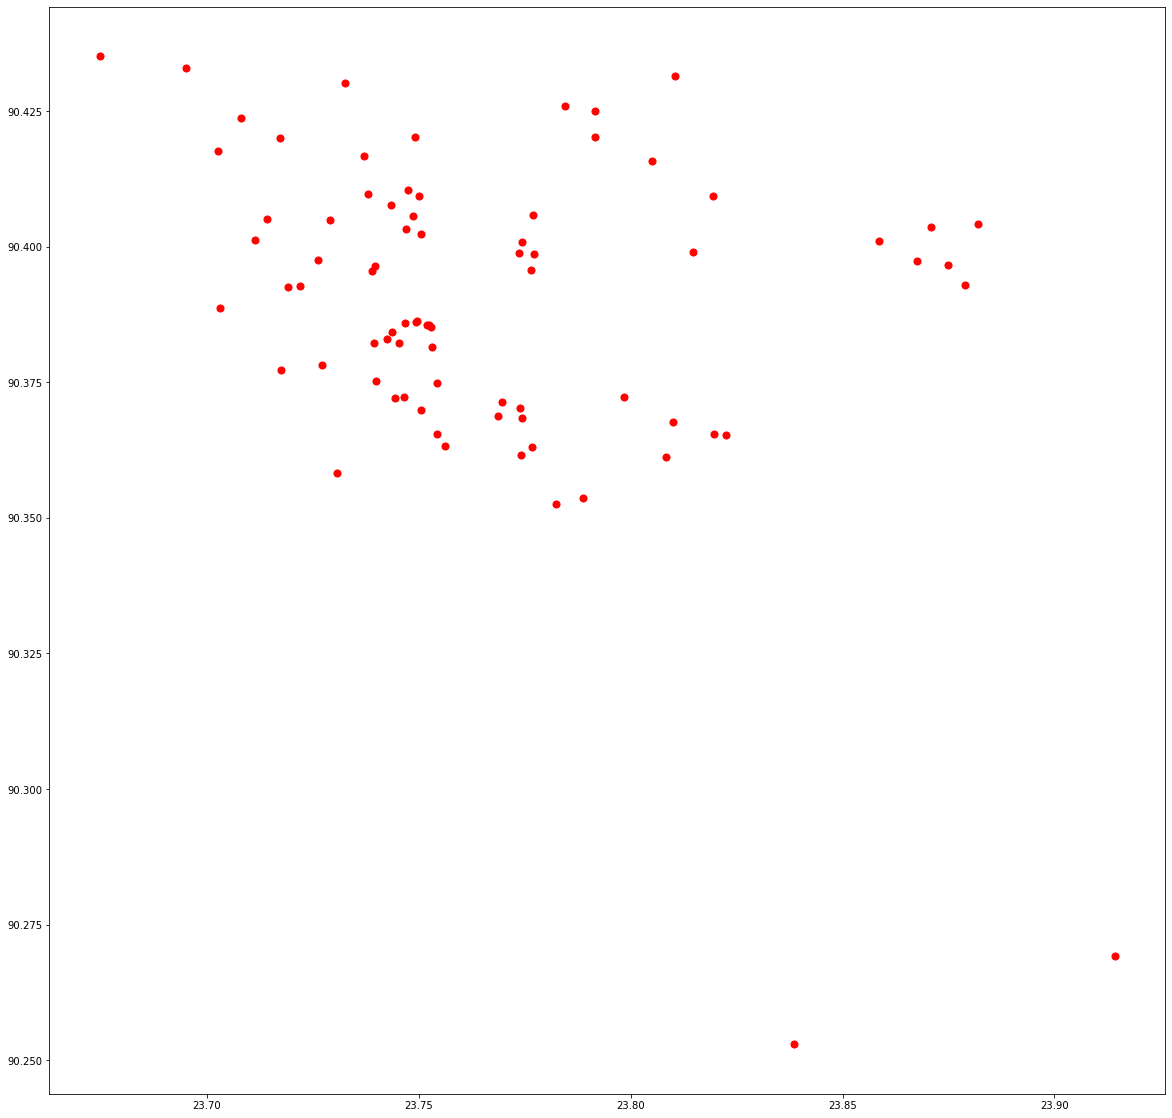

In [27]:
coordinates = [
    (23.726258529330963, 90.39760215443611),  # Dhaka Medical College Hospital - G01
    (23.7113636721593, 90.40128288327219),    # SSMCH - G02
    (23.721888178220713, 90.39266678134557),  # Shishu Hospital - G03
    (23.769551979091727, 90.37133208141863),  # SWMH - G04
    (23.739028157774353, 90.39548058141801),  # BSMMU - G05
    (23.73701446380184, 90.41667109720919),   # Police Hospital - G06
    (23.732505152869958, 90.43005601025426),  # Mugda Medical - G07
    (23.727245339635754, 90.37814792559973),  # BGB Hospital - G08
    (23.814783685079878, 90.39889705443794),  # Samorik Hospital - G09
    (23.819453868399307, 90.40935001025609),  # Kurmitola - G10
    (23.87080752284285, 90.40354398142077),   # Kuwait BD - G11
    (23.717493737377456, 90.37719205781974),  # Kamrangir chor - G12
    (23.77433962044181, 90.36838890516535),   # TB Hospital Shyamoli - G13
    (23.776896719367194, 90.40577550722847),  # Songkramok Byadhi - G14
    (23.773760673697247, 90.37031486792793),  # NITOR - G15
    (23.914206815785917, 90.26912412511575),  # Samorik Hospital(Savar) - G16
    (23.728920323677116, 90.40497918921318),  # Sorkari Kormochari - G17
    (23.714229014360615, 90.40500592374467),  # Dhaka Mohanogor General - G18
    (23.719020414582218, 90.39259933127892),  # DSCC Shishu - G19
    (23.77444364645435, 90.4008203525824),     # DNCC Dedicated Covid - G20
    (23.75061422282243, 90.36979913909104),   # Bangladesh MCH - N01
    (23.74689828803771, 90.40314991210928),   # Holy Family Red Crescent - N02
    (23.73960111901086, 90.39632632258575),   # Birdem - N03
    (23.746377694828784, 90.37219606989669),  # Ibn Sina - N04
    (23.753010718774295, 90.3815061525819),   # Square - N05
    (23.749479686986273, 90.38618615258184),  # Comfort Nursing - N06
    (23.752791839084207, 90.38516703909104),  # Shomorita - N07
    (23.788680663544458, 90.35355048141906),  # Delta Medical College - N08
    (23.742417761326248, 90.38302618327282),  # Labaid - N09
    (23.743634617303403, 90.38422172745472),  # Central Hospital - N10
    (23.791677153192687, 90.42501555740265),  # High Care Hospital - N11
    (23.75186326095531, 90.38555483909101),   # Help & Hope - N12
    (23.746713049788433, 90.3858482121093),   # Green Life - N13
    (23.737880855556384, 90.40968359676359),  # Islami Bank Central - N14
    (23.804910313097285, 90.4157728544377),   # United - N15
    (23.749139762830996, 90.42018828141823),  # Khidma - N16
    (23.879007277702033, 90.39287425443928),  # Shahid Monsur Ali - N17
    (23.747478666730757, 90.41037836792734),  # Sirajul Islam - N18
    (23.81052198596412, 90.43135408327426),   # Evercare - N19
    (23.748542644855437, 90.40553422560019),  # Ad-din Medical - N20
    (23.77643377119459, 90.39564021025521),   # Universla Medical - N21
    (23.752496879864417, 90.38559181210941),  # BRB - N22
    (23.707964710615958, 90.42365933909015),  # Ajgor Ali - N23
    (23.77674549765072, 90.36297432560076),   # BD Specialized - N24
    (23.87487552686038, 90.39664535258447),   # Uttara adhunik - N25
    (23.71713013292547, 90.42005909676308),   # Salauddin - N26
    (23.73932596260316, 90.38228915443636),   # Popular medical - N27
    (23.867565305539124, 90.39739452560266),  # Uttara crescent - N28
    (23.745374110927905, 90.3822240256001),   # Anowar khan - N29
    (23.858537751690243, 90.4009591967661),   # Medical college for women - N30
    (23.808288145246028, 90.36113035464749),  # Dr. M R khan - N31
    (23.77401294737494, 90.3614897781836),    # Dhaka central - N32
    (23.881868548272667, 90.40420552560295),  # Aichi hospital - N33
    (23.743368548190734, 90.40773758327285),  # Monowara hospital private - N34
    (23.791591769240803, 90.42020373909189),  # Jainul Haq shikdar - N35
    (23.83842325478293, 90.25290921025649),   # Enam medical - N36
    (23.7845424722981, 90.42595392374616),    # AMZ - N37
    (23.730582390942406, 90.35817111210898),  # Life and care - N38
    (23.754359956865457, 90.37477546792752),  # Farabi general hospital - N39
    (23.73981521973286, 90.3751340679272),    # Japan BD friendship - N40
    (23.798503360359252, 90.37219025443761),  # Exim Bank Hospital - N41
    (23.756062493992758, 90.3632184544367),   # AL Manar - N42
    (23.768703817463756, 90.36873315258221),  # Dhaka Healthcare - N43
    (23.773694847585368, 90.39884821025517),  # Metro politon Medical centre - N44
    (23.703179382639853, 90.38871456792647),  # Sajeda hospital - N45
    (23.674755148548773, 90.43511936978058),  # Bashundhara ad-din - N46
    (23.782345481118913, 90.35258169490973),  # BIHS General - N47
    (23.750002980978078, 90.40928799676384),  # Dhaka community - N48
    (23.74440953311991, 90.37209985443648),   # Northern Intl - N49
    (23.69496946630764, 90.43284613908983),   # Ad-din Barister - N50
    (23.809882502946316, 90.36768588327422),  # Alok hospital - N51
    (23.754193914452284, 90.36543585244601),  # City hospital - N52
    (23.749307846409437, 90.38608801642633),  # Crescent Gastro Liver - N53
    (23.819693093024494, 90.36543081211082),  # Islami Bank - N54
    (23.822525244233656, 90.36532383723781),  # Marks Medical College - N55
    (23.702592931014344, 90.41755619676282),  # Millenium Specialized - N56
    (23.77723674232899, 90.39864510654571),   # ICCDRB - N57
    (23.750459302871562, 90.40239242374547)   # Insaf Barakah - N58
]

# plot the coordinates
import matplotlib.pyplot as plt

x = []
y = []
for coordinate in coordinates:
    x.append(coordinate[0])
    y.append(coordinate[1])

plt.figure(figsize=(20,20))
#make the ponts larger and red color and add text (index)
plt.scatter(x, y, s=50, c='red')
# for i, txt in enumerate(range(len(coordinates))):
#     plt.annotate(txt, (x[i], y[i]), fontsize=10)
# plt.scatter(x, y)
plt.show()

In [8]:
coordinates[55]

(23.83842325478293, 90.25290921025649)

In [9]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (mean value)
    radius = 6371.0

    # Calculate the distance
    distance = radius * c

    return distance # in kilometers

distances = []
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        distances.append(haversine_distance(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))

# print the minimum distance between two points
print("Minimum distance between two points: " + str(np.min(distances)))

# print the maximum distance between two points
print("Maximum distance between two points: " + str(np.max(distances)))

# print the average distance between two points
print("Average distance between two points: " + str(np.average(distances)))

# print the standard deviation of the distance between two points
print("Standard deviation of the distance between two points: " + str(np.std(distances)))

# print the median of the distance between two points
print("Median of the distance between two points: " + str(np.median(distances)))

# print the 25th percentile of the distance between two points
print("25th percentile of the distance between two points: " + str(np.percentile(distances, 25)))

# print the 75th percentile of the distance between two points
print("75th percentile of the distance between two points: " + str(np.percentile(distances, 75)))

# print the 90th percentile of the distance between two points
print("90th percentile of the distance between two points: " + str(np.percentile(distances, 90))) # 90th percentile means 90% of the distances are less than this value

# print the 95th percentile of the distance between two points
print("95th percentile of the distance between two points: " + str(np.percentile(distances, 95))) # 95th percentile means 95% of the distances are less than this value

# print the 99th percentile of the distance between two points
print("99th percentile of the distance between two points: " + str(np.percentile(distances, 99))) # 99th percentile means 99% of the distances are less than this value



Minimum distance between two points: 0.021560870174856334
Maximum distance between two points: 31.530423207745244
Average distance between two points: 6.986317256894885
Standard deviation of the distance between two points: 5.042767924315816
Median of the distance between two points: 5.669512427689041
25th percentile of the distance between two points: 3.311486529047757
75th percentile of the distance between two points: 9.205193249348255
90th percentile of the distance between two points: 14.50113806902076
95th percentile of the distance between two points: 17.06276577574096
99th percentile of the distance between two points: 22.634213046604955


In [10]:
# print the minimum x coordinate
print("Minimum x coordinate: " + str(np.min(x)))

# print the maximum x coordinate
print("Maximum x coordinate: " + str(np.max(x)))

# print the average x coordinate
print("Average x coordinate: " + str(np.average(x)))

# print the standard deviation of the x coordinate
print("Standard deviation of the x coordinate: " + str(np.std(x)))

# print the median of the x coordinate
print("Median of the x coordinate: " + str(np.median(x)))

# print the 25th percentile of the x coordinate
print("25th percentile of the x coordinate: " + str(np.percentile(x, 25)))

# print the 75th percentile of the x coordinate
print("75th percentile of the x coordinate: " + str(np.percentile(x, 75)))

# print the 90th percentile of the x coordinate
print("90th percentile of the x coordinate: " + str(np.percentile(x, 90))) # 90th percentile means 90% of the x coordinates are less than this value

# print the 95th percentile of the x coordinate
print("95th percentile of the x coordinate: " + str(np.percentile(x, 95))) # 95th percentile means 95% of the x coordinates are less than this value




# print the minimum y coordinate
print("Minimum y coordinate: " + str(np.min(y)))

# print the maximum y coordinate
print("Maximum y coordinate: " + str(np.max(y)))

# print the average y coordinate
print("Average y coordinate: " + str(np.average(y)))

# print the standard deviation of the y coordinate
print("Standard deviation of the y coordinate: " + str(np.std(y)))

# print the median of the y coordinate
print("Median of the y coordinate: " + str(np.median(y)))

# print the 25th percentile of the y coordinate
print("25th percentile of the y coordinate: " + str(np.percentile(y, 25)))

# print the 75th percentile of the y coordinate
print("75th percentile of the y coordinate: " + str(np.percentile(y, 75)))

# print the 90th percentile of the y coordinate
print("90th percentile of the y coordinate: " + str(np.percentile(y, 90))) # 90th percentile means 90% of the y coordinates are less than this value

# print the 95th percentile of the y coordinate
print("95th percentile of the y coordinate: " + str(np.percentile(y, 95))) # 95th percentile means 95% of the y coordinates are less than this value


Minimum x coordinate: 23.674755148548773
Maximum x coordinate: 23.914206815785917
Average x coordinate: 23.767183001148165
Standard deviation of the x coordinate: 0.047406981054451874
Median of the x coordinate: 23.752180070409864
25th percentile of the x coordinate: 23.739394751705085
75th percentile of the x coordinate: 23.78764611573287
90th percentile of the x coordinate: 23.82729464739844
95th percentile of the x coordinate: 23.87141772344548
Minimum y coordinate: 90.25290921025649
Maximum y coordinate: 90.43511936978058
Average y coordinate: 90.38894756280044
Standard deviation of the y coordinate: 0.029247233179382617
Median of the y coordinate: 90.39277051789242
25th percentile of the y coordinate: 90.37219170830238
75th percentile of the y coordinate: 90.40540215013631
90th percentile of the y coordinate: 90.42019291872033
95th percentile of the y coordinate: 90.42656923672237


In [11]:
import pandas as pd
df = pd.DataFrame({'x': x, 'y': y})
df.describe()

,x,y
count,78.000000,78.000000
mean,23.767183,90.388948
std,0.047714,0.029437
min,23.674755,90.252909
25%,23.739395,90.372192
50%,23.752180,90.392771
75%,23.787646,90.405402
max,23.914207,90.435119


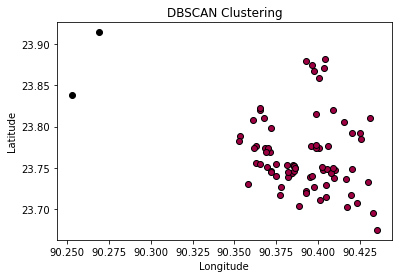

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Convert coordinates to NumPy array
coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=2)  
clusters = dbscan.fit_predict(coordinates_array)

# Plot the clusters
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (clusters == k)
    xy = coordinates_array[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




The Haversine distance between the two points is 559.12 km.


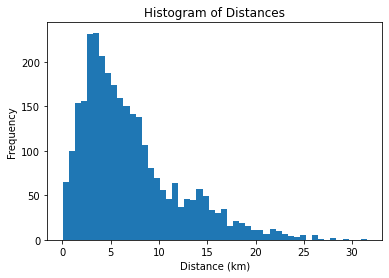

In [13]:

import numpy as np
import matplotlib.pyplot as plt

# Convert coordinates to NumPy array
coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (mean value)
    radius = 6371.0

    # Calculate the distance
    distance = radius * c

    return distance

# Example usage
lat1, lon1 = 37.7749, -122.4194  # San Francisco, CA
lat2, lon2 = 34.0522, -118.2437  # Los Angeles, CA

distance = haversine_distance(lat1, lon1, lat2, lon2)
print(f"The Haversine distance between the two points is {distance:.2f} km.")


# calculate distances between all pairs of coordinates
distances = []
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        distances.append(haversine_distance(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))

# plot distances
plt.hist(distances, bins=50)
plt.title('Histogram of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

e:\Installation\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


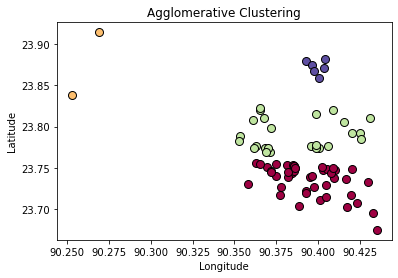

In [14]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Convert coordinates to NumPy array
coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])

agglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = agglomerative.fit_predict(coordinates_array)

# Plot the clusters
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


# Plot the points in each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (clusters == k)
    xy = coordinates_array[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

plt.title('Agglomerative Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.plot(coordinates_array, coordinates_array, 'k.', markersize=2)  # Plot all points
plt.show()



e:\Installation\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


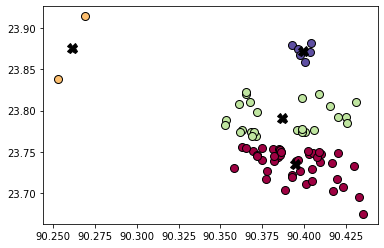

In [15]:

coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])

agglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = agglomerative.fit_predict(coordinates_array)

# find the cluster centers
cluster_centers = []
for i in range(len(unique_labels)):
    cluster_centers.append(np.mean(coordinates_array[clusters == i], axis=0))

# Plot the clusters with centers
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (clusters == k)
    xy = coordinates_array[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

# Plot the cluster centers
plt.plot(np.array(cluster_centers)[:, 1], np.array(cluster_centers)[:, 0], 'kX', markersize=10)


e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


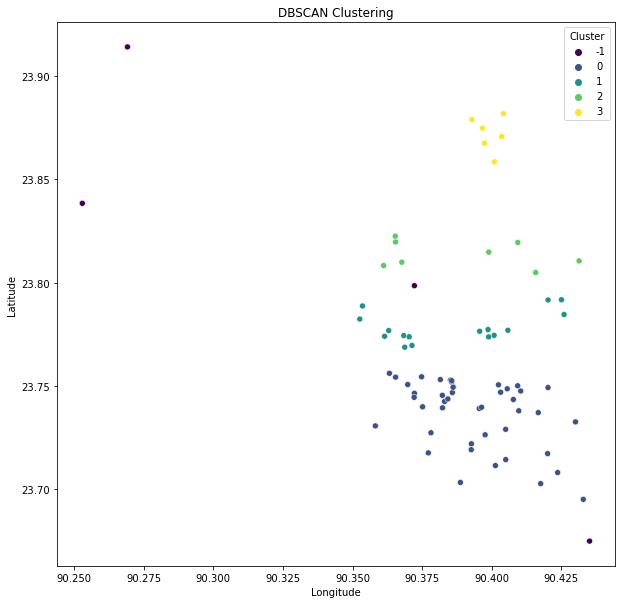

e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Installation\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

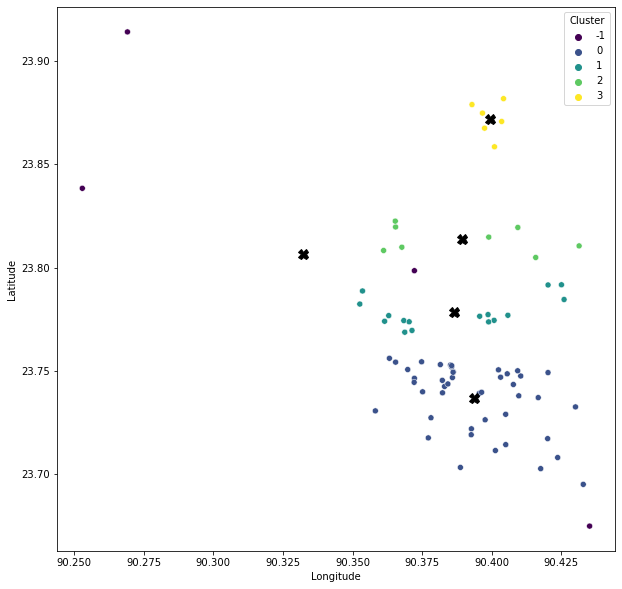

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
df = pd.DataFrame(coordinates_array, columns=['Latitude', 'Longitude'])

# Apply DBSCAN
epsilon = 0.01  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2  # Minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')
df['Cluster'] = dbscan.fit_predict(coordinates_array)

# Plot the clusters using Seaborn
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

cluster_centers = []
unique_labels = set(df['Cluster'])
for i in unique_labels:
    cluster_centers.append(df[df['Cluster'] == i].mean().values)

# Plot the clusters with centers
plt.figure(figsize=(10, 10))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# Plot the centers and points in each cluster using seaborn
plt.plot(np.array(cluster_centers)[:, 1], np.array(cluster_centers)[:, 0], 'kX', markersize=10)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis')



In [17]:
df['Cluster'].value_counts()

Cluster
 0    44
 1    16
 2     8
 3     6
-1     4
Name: count, dtype: int64

In [18]:

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (mean value)
    radius = 6371.0

    distance = radius * c

    return distance

distances = []
for i in range(len(cluster_centers)):
    for j in range(i + 1, len(cluster_centers)):
        distances.append(haversine_distance(cluster_centers[i][0], cluster_centers[i][1], cluster_centers[j][0], cluster_centers[j][1]))
        print(f"Distance between cluster centers {i} and {j}: {haversine_distance(cluster_centers[i][0], cluster_centers[i][1], cluster_centers[j][0], cluster_centers[j][1]):.2f} km")



Distance between cluster centers 0 and 1: 4.69 km
Distance between cluster centers 0 and 2: 8.57 km
Distance between cluster centers 0 and 3: 15.06 km
Distance between cluster centers 0 and 4: 9.95 km
Distance between cluster centers 1 and 2: 3.94 km
Distance between cluster centers 1 and 3: 10.50 km
Distance between cluster centers 1 and 4: 6.31 km
Distance between cluster centers 2 and 3: 6.57 km
Distance between cluster centers 2 and 4: 5.86 km
Distance between cluster centers 3 and 4: 9.98 km


In [19]:
from sklearn.cluster import KMeans

coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
X = coordinates_array[:,-1]  # Reverse the order of the columns
clusters = kmeans.fit_predict(X)

unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (clusters == k)
    xy = coordinates_array[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



ValueError: Expected 2D array, got 1D array instead:
array=[90.39760215 90.40128288 90.39266678 90.37133208 90.39548058 90.4166711
 90.43005601 90.37814793 90.39889705 90.40935001 90.40354398 90.37719206
 90.36838891 90.40577551 90.37031487 90.26912413 90.40497919 90.40500592
 90.39259933 90.40082035 90.36979914 90.40314991 90.39632632 90.37219607
 90.38150615 90.38618615 90.38516704 90.35355048 90.38302618 90.38422173
 90.42501556 90.38555484 90.38584821 90.4096836  90.41577285 90.42018828
 90.39287425 90.41037837 90.43135408 90.40553423 90.39564021 90.38559181
 90.42365934 90.36297433 90.39664535 90.4200591  90.38228915 90.39739453
 90.38222403 90.4009592  90.36113035 90.36148978 90.40420553 90.40773758
 90.42020374 90.25290921 90.42595392 90.35817111 90.37477547 90.37513407
 90.37219025 90.36321845 90.36873315 90.39884821 90.38871457 90.43511937
 90.35258169 90.409288   90.37209985 90.43284614 90.36768588 90.36543585
 90.38608802 90.36543081 90.36532384 90.4175562  90.39864511 90.40239242].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#make it 1D array
coordinates_array = np.array([(lat, lon) for lat, lon in coordinates])
coordinates_array = coordinates_array.flatten()
coordinates_array = coordinates_array.reshape(-1, 1)

coordinates_array

array([[23.72625853],
       [90.39760215],
       [23.71136367],
       [90.40128288],
       [23.72188818],
       [90.39266678],
       [23.76955198],
       [90.37133208],
       [23.73902816],
       [90.39548058],
       [23.73701446],
       [90.4166711 ],
       [23.73250515],
       [90.43005601],
       [23.72724534],
       [90.37814793],
       [23.81478369],
       [90.39889705],
       [23.81945387],
       [90.40935001],
       [23.87080752],
       [90.40354398],
       [23.71749374],
       [90.37719206],
       [23.77433962],
       [90.36838891],
       [23.77689672],
       [90.40577551],
       [23.77376067],
       [90.37031487],
       [23.91420682],
       [90.26912413],
       [23.72892032],
       [90.40497919],
       [23.71422901],
       [90.40500592],
       [23.71902041],
       [90.39259933],
       [23.77444365],
       [90.40082035],
       [23.75061422],
       [90.36979914],
       [23.74689829],
       [90.40314991],
       [23.73960112],
       [90

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
data_points = np.random.rand(100, 2) * 10  # 100 points in 2D space

# Specify the number of clusters (K)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_points)

# Visualize the results
plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


e:\Installation\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'